In [1]:
import os
os.chdir("C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python310\\Scripts\\image_processing_UCCC2513")

In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Activity 1

In [6]:
# Hough Transform 

img = cv.imread(cv.samples.findFile('coins_1.jfif'))
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.GaussianBlur(gray, (7,7), 1.5)

#hough circle transform
row = img.shape[0]
circles_edge = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1, row/8, param1=150, param2=25)

#draw circles
if circles_edge is not None:
    circles_edge = np.uint8(np.around(circles))
    for i in circles_edge[0]:
        #center
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100,100,100), 3)
        #Radius
        radius = i[2]
        #plot whole circle 
        cv.circle(img, center, radius, (255, 0, 0), 2)
        
cv.imshow("Hough Transform", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Blob detection 

image = cv.imread('coins_1.jfif')
img_blur = cv.medianBlur(image, 5)
img_gray = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)

# parameters
params = cv.SimpleBlobDetector_Params()
params.filterByArea = True
params.filterByCircularity = True
params.filterByConvexity = False
params.filterByInertia = False
params.blobColor = 255 #to extract light blobs

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(img_gray)

# Draw detected blobs as circles
im_keypoints = cv.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("Blob detection", im_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
combine_result = np.concatenate((img, im_keypoints), axis = 0)

cv.imshow("Combine", combine_result)
cv.waitKey(0)
cv.destroyAllWindows()

The image detection using Blob dectection id more clearer and accurate compare to Hough Transform.

# Activity 2

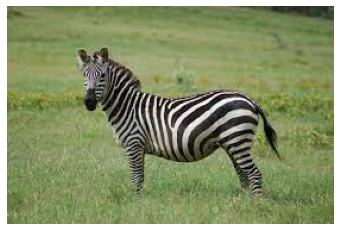

In [14]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(img_rgb)

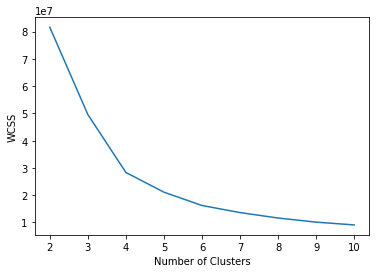

In [20]:
# For k-means clustering, reshape the image to be a list of pixels
reshape_img = img_rgb.reshape((-1, 3))

# Convert uint8 to float
reshape_img = np.float32(img_reshape)

# define criteria, number of clusters and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K_array = np.array([])
WCSS_array = np.array([]) 

for K in range (2,11):
    ret, label, center = cv.kmeans(reshape_img, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    K_array = np.append(K_array,K)
    WCSS_array = np.append(WCSS_array,ret)

plt.plot(K_array, WCSS_array)
plt.xlabel('Number of Clusters'), plt.ylabel('WCSS')
plt.show()

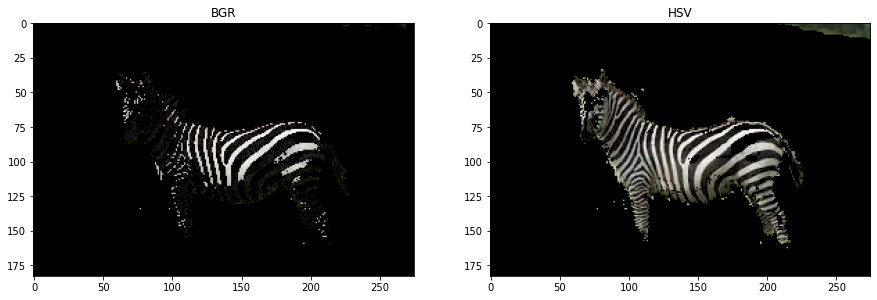

In [22]:
# Apply the clustering method on BGR and HSV

img = cv.imread('zebra.jfif')
img_bgr = img.copy()
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#reshape the image, convert to float 
img_bgr_reshape = img_bgr.reshape((-1, 3))
img_bgr_reshape = np.float32(img_bgr_reshape)
img_hsv_reshape = img_hsv.reshape((-1, 3))
img_hsv_reshape = np.float32(img_hsv_reshape)


# define criteria, number of clusters and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K= 6
attempts = 10
ret, label, center = cv.kmeans(img_bgr_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
ret_hsv, label_hsv, center_hsv = cv.kmeans(img_hsv_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img_bgr.shape))

center_hsv = np.uint8(center_hsv)
res_hsv = center_hsv[label_hsv.flatten()]
result_image_hsv = res_hsv.reshape((img_hsv.shape))


from numpy import linalg as LN

white_color = (255, 255, 255)
black_color = (0, 0, 0)

#bgr white & black mask 
idx_white = np.argmin(LN.norm(white_color - center, axis = 1))

#mask
white_mask = result_image == center[idx_white]
seg_result_white = img_bgr*(white_mask.astype("uint8"))

black = np.argmin(LN.norm(black_color - center, axis = 1))

#mask
black_mask = result_image == center[black]
seg_result_black = img_bgr*(black_mask.astype("uint8"))

seg_result_bgr = cv.bitwise_or(seg_result_white, seg_result_black, mask = None)



#hsv white & black mask 
white_color_hsv = (0, 0, 255)
black_color_hsv = (0, 0, 0)

idx_white_hsv = np.argmin(LN.norm(white_color_hsv - center_hsv, axis = 1))
white_mask2 = result_image_hsv == center_hsv[idx_white_hsv]
seg_result_white_hsv = img_hsv*(white_mask2.astype("uint8"))

idx_black_hsv = np.argmin(LN.norm(black_color_hsv - center_hsv, axis = 1))
black_mask2 = result_image_hsv == center_hsv[idx_black_hsv]
seg_result_black_hsv = img_hsv*(black_mask2.astype("uint8"))

seg_result_hsv = cv.bitwise_or(seg_result_white_hsv, seg_result_black_hsv, mask = None)


#show the result
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(seg_result_bgr, cv.COLOR_BGR2RGB))
plt.title('BGR')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(seg_result_hsv, cv.COLOR_HSV2RGB))
plt.title('HSV')
plt.show()

Optimal is k = 6. There is more area being segmented from zebra by using HSV color space compared to BGR color space.